# Investment Value

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

## Create a DataFrame with the current amount of shares

In [3]:
# Set current amount of shares data
# YOUR CODE HERE!

shares_data = {
    "shares": [100,150]
}

# Set the tickers
tickers = ["MSFT","AAPL"]


# Create the shares DataFrame
# YOUR CODE HERE!
df_shares = pd.DataFrame(shares_data, index=tickers)
# Display shares data
# YOUR CODE HERE!

df_shares

,shares
MSFT,100
AAPL,150


In [5]:
# Load .env environment variables
# YOUR CODE HERE!
load_dotenv()

True

In [6]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


In [9]:
# Verify that Alpaca key and secret were correctly loaded
# YOUR CODE HERE!
print(type(alpaca_api_key))
print(type(alpaca_secret_key))

<class 'str'>
<class 'str'>


In [10]:
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
        alpaca_api_key,
        alpaca_secret_key,
        api_version="v2")

In [12]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2021-01-04", tz="America/New_York").isoformat() 

In [13]:
# Set timeframe to one day ('1D') for the Alpaca API
# YOUR CODE HERE!
timeframe ="1D"

In [15]:
# Get current price data for MSFT and AAPL
# YOUR CODE HERE!
df_portfolio = alpaca.get_barset(
            tickers, 
            timeframe,
            start = today,
            end = today).df
# Display sample data
# YOUR CODE HERE!

df_portfolio

AAPL                                       \
                             open      high     low   close     volume   
time                                                                     
2021-01-04 00:00:00-05:00  133.52  133.6116  126.76  129.41  123353442   

                             MSFT                                 
                             open high     low   close    volume  
time                                                              
2021-01-04 00:00:00-05:00  222.53  223  214.81  217.81  27651582

## Calculate the current value in dollars of the stock portfolio

In [17]:
# Fetch the current closing prices from the DataFrame
# YOUR CODE HERE!

msft_price = df_portfolio['MSFT']['close']
aapl_price = df_portfolio['AAPL']['close']

aapl_price

time
2021-01-04 00:00:00-05:00    129.41
Name: close, dtype: float64

In [18]:
df_shares

,shares
MSFT,100
AAPL,150


In [20]:
msft_shares = df_shares.loc['MSFT']["shares"]
aapl_shares = df_shares.loc['AAPL']["shares"]
aapl_shares

150

In [23]:
# Compute the current value in dollars of the stock portfolio
# YOUR CODE HERE!
msft_value = float(msft_price) * msft_shares
msft_value

aapl_value = float(aapl_price) * aapl_shares
aapl_value
# Print the current value of the stocks portfolio
# YOUR CODE HERE!

19411.5

## Plot stock portfolio composition

### Create a DataFrame with the current value of shares

In [24]:
# Set the data for the shares value DataFrame
# YOUR CODE HERE!

value_data = {
        "MSFT": [msft_value],
        "AAPL": [aapl_value]
}


# Create a DataFrame with the current value of shares
# YOUR CODE HERE!

df_value = pd.DataFrame(value_data)

# Display DataFrame data
# YOUR CODE HERE!
df_value

,MSFT,AAPL
0,21781.0,19411.5


<AxesSubplot:title={'center':'Apple and MSFT'}, ylabel='shares'>

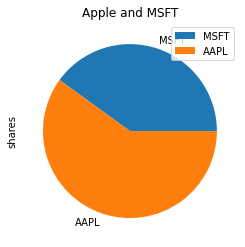

In [25]:
# Create a pie chart to show the proportion of stocks in the portfolio
# YOUR CODE HERE!
df_shares.plot.pie(y="shares", title="Apple and MSFT")

<AxesSubplot:title={'center':'Current Portfolio Value'}>

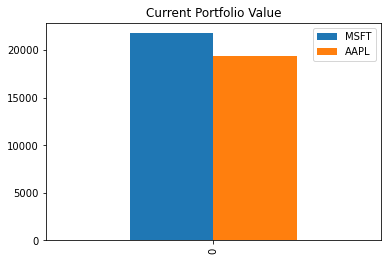

In [26]:
# Create a bar plot to show the value of shares
# YOUR CODE HERE!
df_value.plot.bar(title="Current Portfolio Value")